In [1]:
# Data Loading and Exploration
import pandas as pd

file_path = 'owid-covid-data.csv'

# Loading the dataset
df = pd.read_csv(file_path)


print("Column names:")
print(df.columns)
print("\n" + "="*30 + "\n")


print("First 5 rows of the dataframe:")
print(df.head())
print("\n" + "="*30 + "\n")


print("Number of missing values per column:")
print(df.isnull().sum())

Column names:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smooth

In [2]:
# Data Cleaning

# 1. Filter countries of interest
countries_of_interest = ['Kenya', 'USA', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)].copy()
print("DataFrame after filtering for specific countries:")
print(df_filtered['location'].unique()) # Verify the countries
print("\n" + "="*30 + "\n")

# 2. Drop rows with missing dates
df_cleaned = df_filtered.dropna(subset=['date'])
print(f"Number of rows after dropping rows with missing dates: {len(df_cleaned)}")
print(f"Number of missing dates: {df_cleaned['date'].isnull().sum()}")
print("\n" + "="*30 + "\n")

# Identify critical numeric columns where missing values might be problematic
critical_numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']

# Drop rows where critical numeric values are missing
df_cleaned = df_cleaned.dropna(subset=critical_numeric_cols)
print(f"Number of rows after dropping rows with missing critical numeric values: {len(df_cleaned)}")
print(f"Missing values in critical columns after dropping:\n{df_cleaned[critical_numeric_cols].isnull().sum()}")
print("\n" + "="*30 + "\n")


# 3. Convert date column to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
print("Data type of 'date' column after conversion:")
print(df_cleaned['date'].dtype)
print("\n" + "="*30 + "\n")

# 4. Handle missing numeric values (example using 'total_vaccinations')

# Fill missing 'total_vaccinations' with 0
df_filled_zero = df_cleaned.copy()
df_filled_zero['total_vaccinations'].fillna(0, inplace=True)
print("Missing values in 'total_vaccinations' after filling with 0:", df_filled_zero['total_vaccinations'].isnull().sum())
print("\n" + "="*30 + "\n")

DataFrame after filtering for specific countries:
['India' 'Kenya']


Number of rows after dropping rows with missing dates: 3356
Number of missing dates: 0


Number of rows after dropping rows with missing critical numeric values: 3348
Missing values in critical columns after dropping:
total_cases     0
total_deaths    0
new_cases       0
new_deaths      0
dtype: int64


Data type of 'date' column after conversion:
datetime64[ns]


Missing values in 'total_vaccinations' after filling with 0: 0




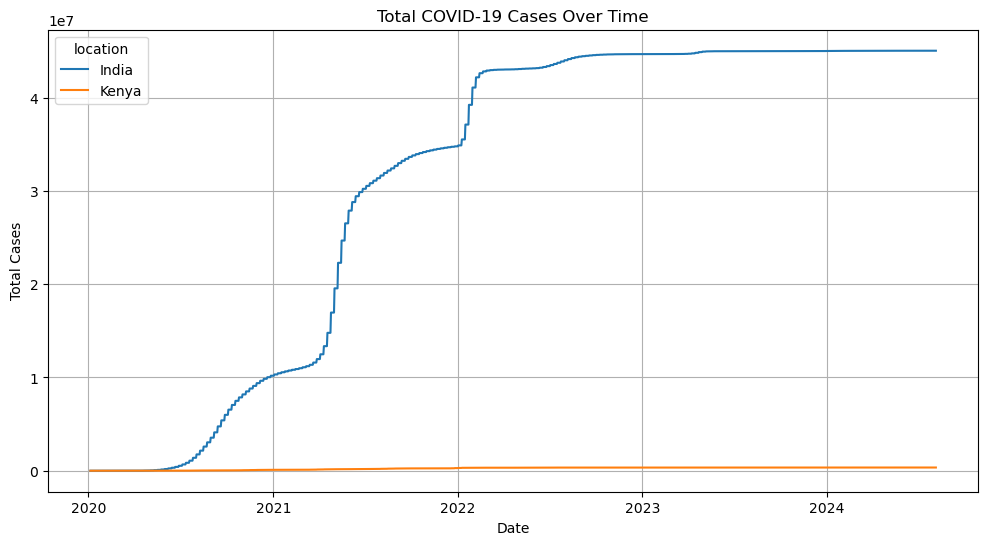

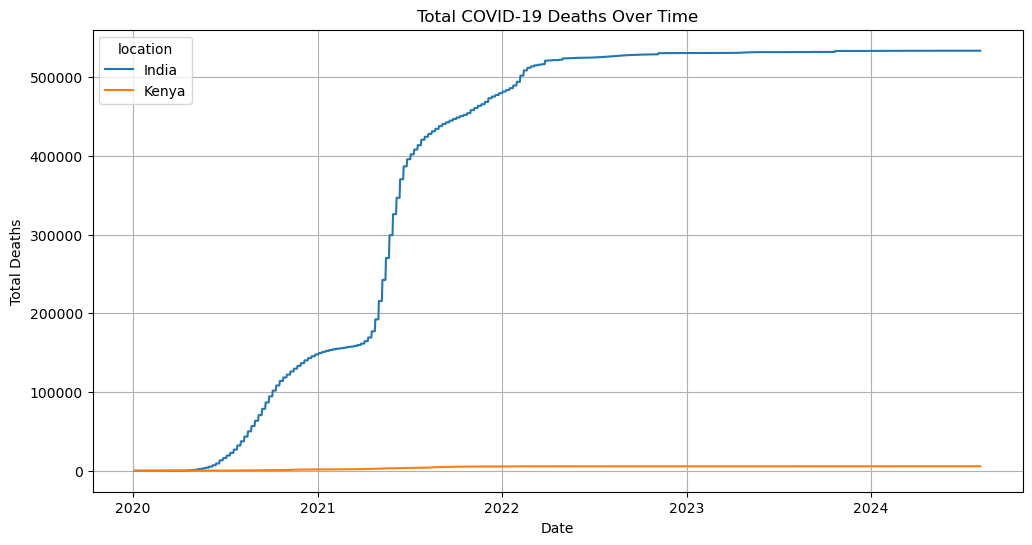

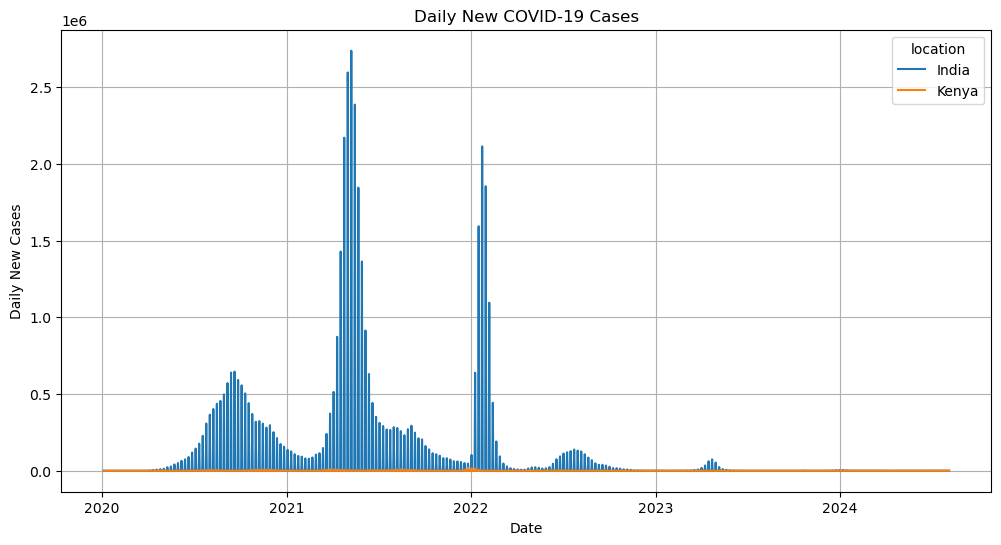

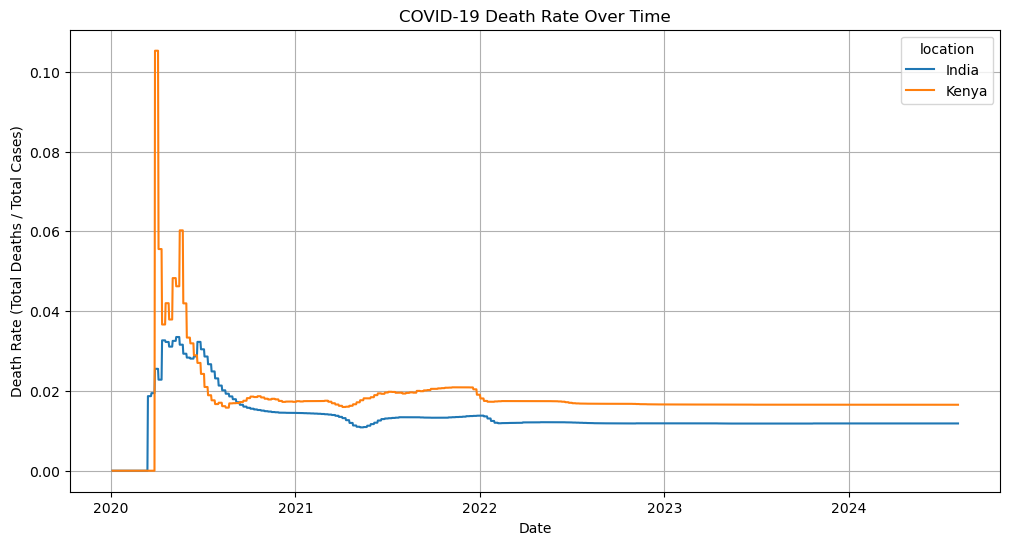

In [3]:
# Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your cleaned DataFrame is named 'df_cleaned' and contains the 'date',
# 'location', 'total_cases', 'total_deaths', and 'new_cases' columns.

# Ensure 'date' column is in datetime format (as per previous steps)
if not pd.api.types.is_datetime64_any_dtype(df_cleaned['date']):
    df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
    print("Converted 'date' column to datetime format.")

# Define the countries of interest
countries_of_interest = ['Kenya', 'USA', 'India']
df_countries = df_cleaned[df_cleaned['location'].isin(countries_of_interest)]

# 1. Plot total cases over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_countries, x='date', y='total_cases', hue='location')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time')
plt.grid(True)
plt.show()

# 2. Plot total deaths over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_countries, x='date', y='total_deaths', hue='location')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time')
plt.grid(True)
plt.show()

# 3. Compare daily new cases between countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_countries, x='date', y='new_cases', hue='location')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('Daily New COVID-19 Cases')
plt.grid(True)
plt.show()

# 4. Calculate the death rate: total_deaths / total_cases
# Be cautious about division by zero; handle cases where total_cases is zero
df_countries['death_rate'] = df_countries.apply(
    lambda row: row['total_deaths'] / row['total_cases'] if row['total_cases'] > 0 else 0,
    axis=1
)

# Plot the death rate over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_countries, x='date', y='death_rate', hue='location')
plt.xlabel('Date')
plt.ylabel('Death Rate (Total Deaths / Total Cases)')
plt.title('COVID-19 Death Rate Over Time')
plt.grid(True)
plt.show()

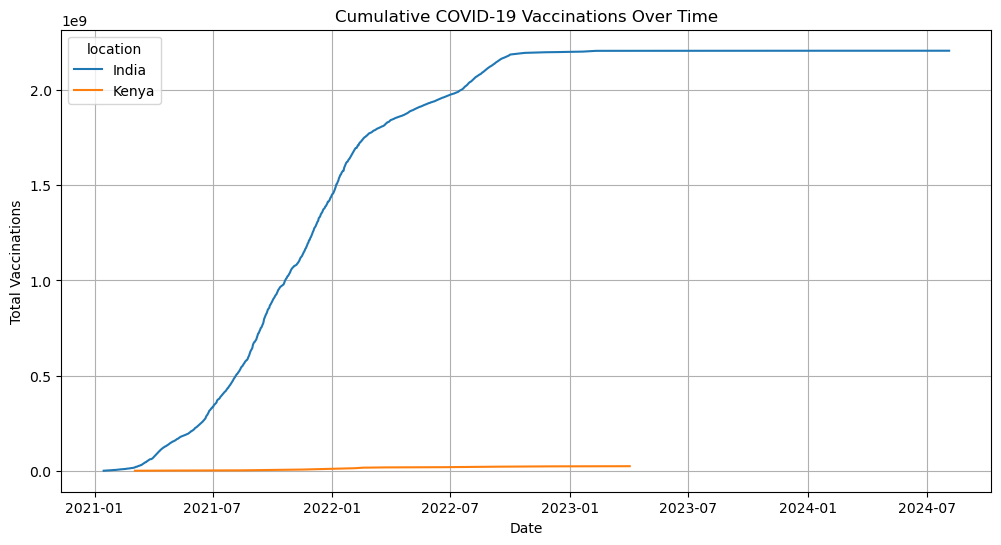

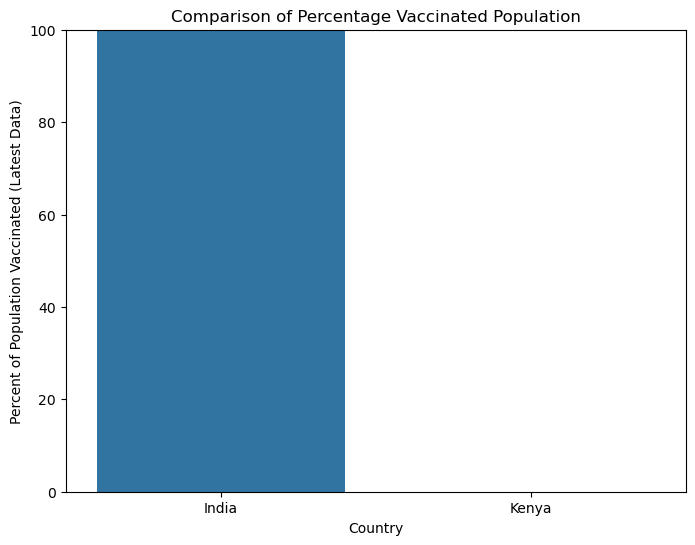

In [8]:
# Visulaisation of Vaccination Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your cleaned DataFrame is named 'df_cleaned' and contains
# 'date', 'location', 'total_vaccinations', and 'population' columns.

# Ensure 'date' column is in datetime format
if not pd.api.types.is_datetime64_any_dtype(df_cleaned['date']):
    df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
    print("Converted 'date' column to datetime format.")

# Define the countries of interest
countries_of_interest = ['Kenya', 'USA', 'India']
df_vaccination = df_cleaned[df_cleaned['location'].isin(countries_of_interest)].copy()

# 1. Plot cumulative vaccinations over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_vaccination, x='date', y='total_vaccinations', hue='location')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.grid(True)
plt.show()

# 2. Compare % vaccinated population (using the latest available data for each country)
latest_vaccination_data = df_vaccination.groupby('location').apply(lambda x: x.nlargest(1, 'date')).reset_index(drop=True)

# Ensure population is not zero to avoid division by zero
latest_vaccination_data['population'] = latest_vaccination_data['population'].replace(0, 1) # Replace 0 with 1 for calculation

latest_vaccination_data['percent_vaccinated'] = (latest_vaccination_data['total_vaccinations'] / latest_vaccination_data['population']) * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=latest_vaccination_data, x='location', y='percent_vaccinated')
plt.xlabel('Country')
plt.ylabel('Percent of Population Vaccinated (Latest Data)')
plt.title('Comparison of Percentage Vaccinated Population')
plt.ylim(0, 100) # Set y-axis limit to 0-100%
plt.show()



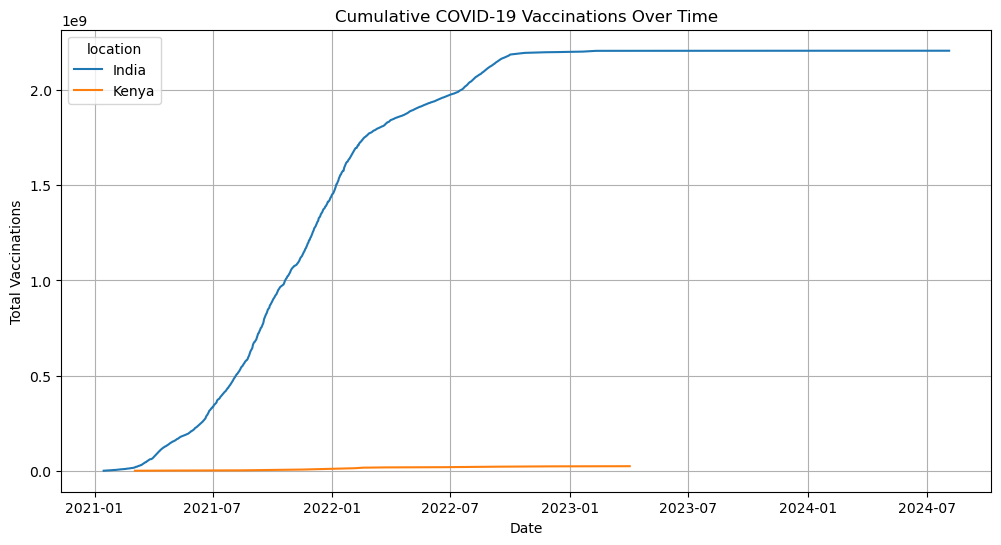

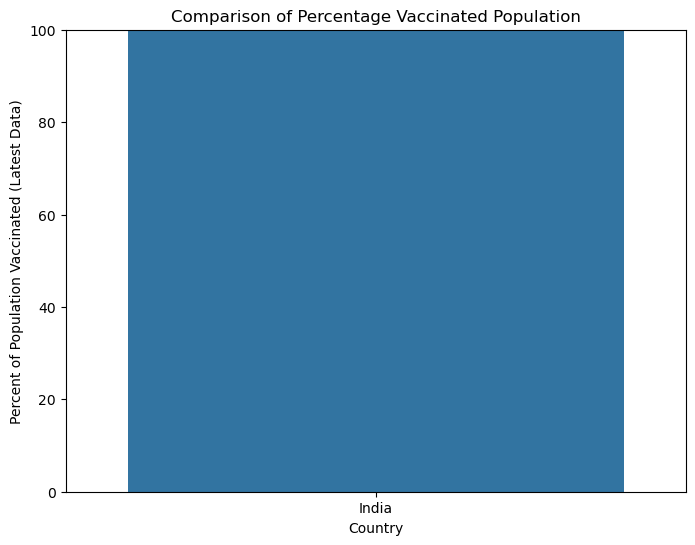

No latest vaccination data found for Kenya.
No latest vaccination data found for USA.


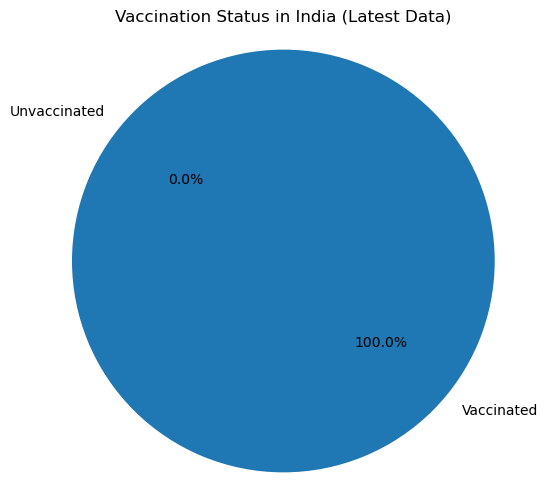

In [5]:
# Visualization of Vaccination Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy for isnan check

# Assuming your cleaned DataFrame is named 'df_cleaned' and contains
# 'date', 'location', 'total_vaccinations', and 'population' columns.

# Ensure 'date' column is in datetime format
if not pd.api.types.is_datetime64_any_dtype(df_cleaned['date']):
    df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
    print("Converted 'date' column to datetime format.")

# Define the countries of interest
countries_of_interest = ['Kenya', 'USA', 'India']
df_vaccination = df_cleaned[df_cleaned['location'].isin(countries_of_interest)].copy()

# 1. Plot cumulative vaccinations over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_vaccination, x='date', y='total_vaccinations', hue='location')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.grid(True)
plt.show()

# 2. Compare % vaccinated population (using the latest available data for each country)
latest_vaccination_data = df_vaccination.groupby('location').apply(lambda x: x.nlargest(1, 'date')).reset_index(drop=True)

# Ensure population is not zero or NaN to avoid division by zero or errors in calculation
latest_vaccination_data['population'] = latest_vaccination_data['population'].replace(0, np.nan) # Replace 0 with NaN first
latest_vaccination_data.dropna(subset=['population', 'total_vaccinations'], inplace=True) # Drop rows where population or total_vaccinations is NaN

latest_vaccination_data['percent_vaccinated'] = (latest_vaccination_data['total_vaccinations'] / latest_vaccination_data['population']) * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=latest_vaccination_data, x='location', y='percent_vaccinated')
plt.xlabel('Country')
plt.ylabel('Percent of Population Vaccinated (Latest Data)')
plt.title('Comparison of Percentage Vaccinated Population')
plt.ylim(0, 100) # Set y-axis limit to 0-100%
plt.show()

# Optional: Pie charts for vaccinated vs. unvaccinated (using the latest data)
for country in countries_of_interest:
    country_latest = latest_vaccination_data[latest_vaccination_data['location'] == country]

    if not country_latest.empty:
        country_latest = country_latest.iloc[0]
        vaccinated = country_latest['total_vaccinations']
        population = country_latest['population']

        # Ensure vaccinated and population are not NaN before calculating unvaccinated and plotting
        if not pd.isna(vaccinated) and not pd.isna(population) and population > 0:
            unvaccinated = population - vaccinated
            # Ensure unvaccinated is not negative due to data inconsistencies
            unvaccinated = max(0, unvaccinated)

            labels = ['Vaccinated', 'Unvaccinated']
            sizes = [vaccinated, unvaccinated]

            # Check if total size is zero before plotting pie chart
            if sum(sizes) > 0:
                plt.figure(figsize=(6, 6))
                plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
                plt.title(f'Vaccination Status in {country} (Latest Data)')
                plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
                plt.show()
            else:
                print(f"Total vaccinations and unvaccinated population sum to zero for {country}. Cannot create pie chart.")
        else:
            print(f"Vaccination or population data is not sufficient or invalid for {country} to create a pie chart.")
    else:
        print(f"No latest vaccination data found for {country}.")

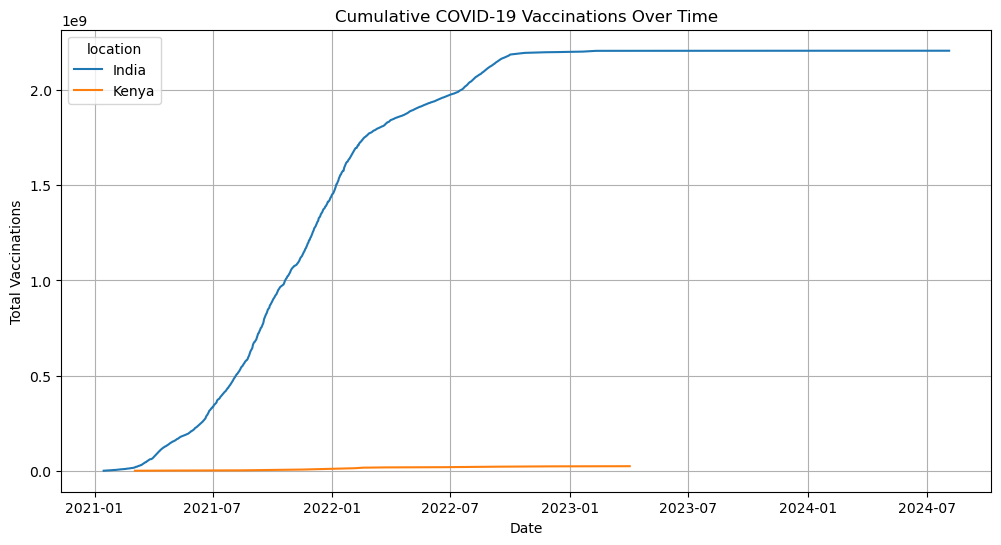

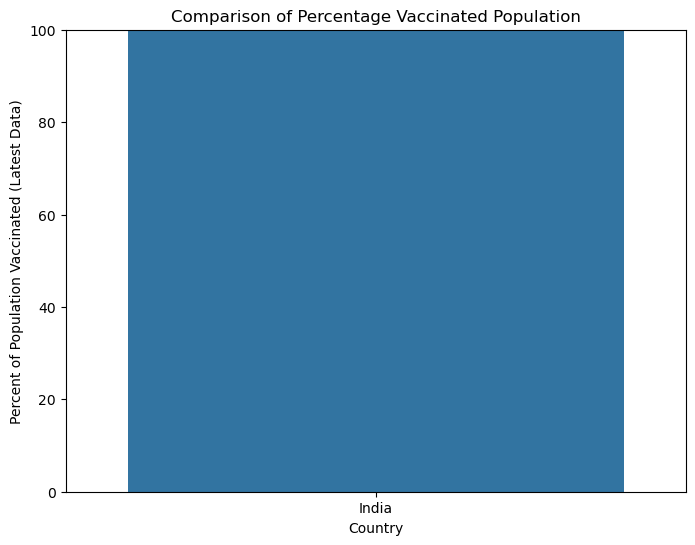

No latest vaccination data found for Kenya.
No latest vaccination data found for USA.


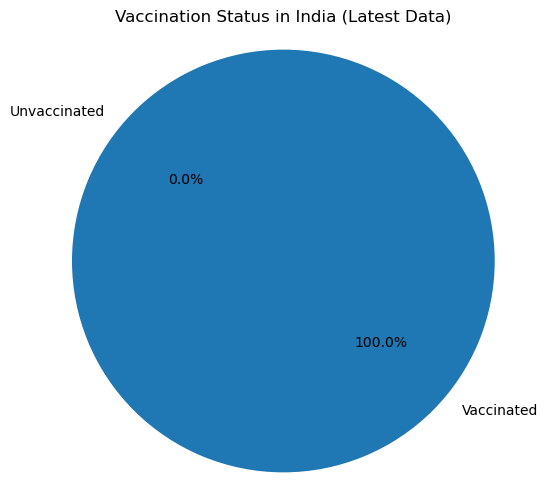

In [9]:
# Data Analysis and Insights
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy for isnan check

# Assuming your cleaned DataFrame is named 'df_cleaned' and contains
# 'date', 'location', 'total_vaccinations', and 'population' columns.

# Ensure 'date' column is in datetime format
if not pd.api.types.is_datetime64_any_dtype(df_cleaned['date']):
    df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
    print("Converted 'date' column to datetime format.")

# Define the countries of interest
countries_of_interest = ['Kenya', 'USA', 'India']
df_vaccination = df_cleaned[df_cleaned['location'].isin(countries_of_interest)].copy()

# 1. Plot cumulative vaccinations over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_vaccination, x='date', y='total_vaccinations', hue='location')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.grid(True)
plt.show()

# 2. Compare % vaccinated population (using the latest available data for each country)
latest_vaccination_data = df_vaccination.groupby('location').apply(lambda x: x.nlargest(1, 'date')).reset_index(drop=True)

# Ensure population is not zero or NaN to avoid division by zero or errors in calculation
latest_vaccination_data['population'] = latest_vaccination_data['population'].replace(0, np.nan) # Replace 0 with NaN first
latest_vaccination_data.dropna(subset=['population', 'total_vaccinations'], inplace=True) # Drop rows where population or total_vaccinations is NaN

latest_vaccination_data['percent_vaccinated'] = (latest_vaccination_data['total_vaccinations'] / latest_vaccination_data['population']) * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=latest_vaccination_data, x='location', y='percent_vaccinated')
plt.xlabel('Country')
plt.ylabel('Percent of Population Vaccinated (Latest Data)')
plt.title('Comparison of Percentage Vaccinated Population')
plt.ylim(0, 100) # Set y-axis limit to 0-100%
plt.show()

# Optional: Pie charts for vaccinated vs. unvaccinated (using the latest data)
for country in countries_of_interest:
    country_latest = latest_vaccination_data[latest_vaccination_data['location'] == country]

    if not country_latest.empty:
        country_latest = country_latest.iloc[0]
        vaccinated = country_latest['total_vaccinations']
        population = country_latest['population']

        # Check if vaccinated and population are not NaN before calculating unvaccinated and plotting
        if not pd.isna(vaccinated) and not pd.isna(population) and population > 0:
            unvaccinated = population - vaccinated
            # Ensure unvaccinated is not negative due to data inconsistencies
            unvaccinated = max(0, unvaccinated)

            labels = ['Vaccinated', 'Unvaccinated']
            sizes = [vaccinated, unvaccinated]

            # Check if total size is zero before plotting pie chart
            if sum(sizes) > 0:
                plt.figure(figsize=(6, 6))
                plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
                plt.title(f'Vaccination Status in {country} (Latest Data)')
                plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
                plt.show()
            else:
                print(f"Total vaccinations and unvaccinated population sum to zero for {country}. Cannot create pie chart.")
        else:
            print(f"Vaccination or population data is not sufficient or invalid for {country} to create a pie chart.")
    else:
        print(f"No latest vaccination data found for {country}.")